1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [5]:
# Cargar Las Librerias necesrias
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [6]:
#cargar archivo
Datos = pd.read_csv('./Titanic-Dataset.csv')

In [7]:
#lectura de datos para realizar el 
Datos.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos de Age')

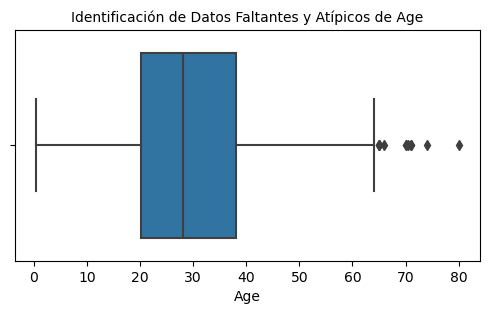

In [9]:
#Identificación de Datos Faltantes y Atípicos de Age
plt.figure(figsize=(6, 3))
sns.boxplot (x=Datos ['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos de Age', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos de SibSp')

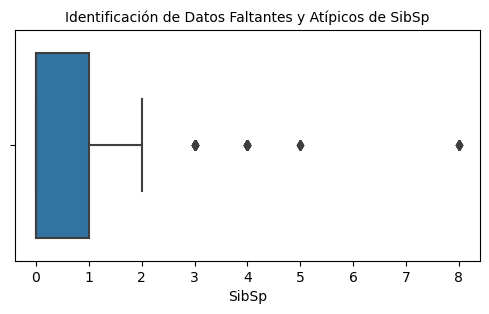

In [10]:
#Identificación de Datos Faltantes y Atípicos de SibSp
plt.figure(figsize=(6, 3))
sns.boxplot (x=Datos ['SibSp'])
plt.title('Identificación de Datos Faltantes y Atípicos de SibSp', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos de Parch')

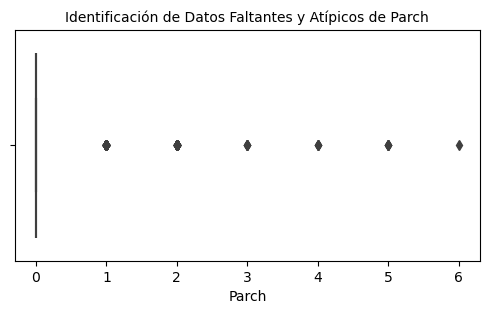

In [11]:
#Identificación de Datos Faltantes y Atípicos de Parch
plt.figure(figsize=(6, 3))
sns.boxplot (x=Datos ['Parch'])
plt.title('Identificación de Datos Faltantes y Atípicos de Parch', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos de Fare')

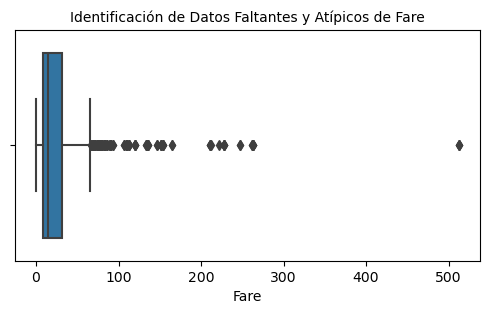

In [12]:
#Identificación de Datos Faltantes y Atípicos de Fare
plt.figure(figsize=(6, 3))
sns.boxplot (x=Datos ['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos de Fare', fontsize=10)

Al ver el archivo se identifico que contaba con 800 valores faltantes el culumna Age, entonces si modificaba los valores atipico asi me borraria todos esos datos, por eso me vi en la necesidad de no perder datos agregarle la media a los valores faltantes, para asi poder manipular mejor el documento, y tambien para la culumna Cabin que tambien tenia acomulado varios sin datos

In [13]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# Reemplazar los valores faltantes en 'Embarked' por la moda
moda_cabina = Datos['Embarked'].mode()[0]  # [0] para obtener el primer valor de la moda
Datos['Embarked'].fillna(moda_cabina, inplace=True)

In [15]:
# Reemplazar los valores faltantes pos la media
media_edad = Datos['Age'].mean()
Datos['Age'].fillna(media_edad, inplace=True)

In [16]:
# Reemplazar los valores faltantes en 'Cabin' por la moda
moda_cabina = Datos['Cabin'].mode()[0]  # [0] para obtener el primer valor de la moda
Datos['Cabin'].fillna(moda_cabina, inplace=True)

In [17]:
#Conteo de Datos Atípicos
nivel_minimo=1
nivel_maximo=80
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 7


In [18]:
Datos=Datos[(Datos['Age']<=nivel_maximo)&(Datos['Age']>=nivel_minimo)]

In [19]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Como se puede observar de aqui se le agrego como valor minimo se espesifico que era >= mayor o igual que el valor_minimo ya que al no especificar que tambien era igual me eliminaba los 0 y me dejaba sin datos

In [20]:
#Conteo de Datos Atípicos
nivel_minim=0
nivel_maxim=4
Total_Atipicos=((Datos['SibSp']<nivel_minim)|(Datos['SibSp']>nivel_maxim)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 12


In [21]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['SibSp']<=nivel_maxim)&(Datos['SibSp']>=nivel_minim)]

In [22]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['SibSp']<nivel_minim)|(Datos['SibSp']>nivel_maxim)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [23]:
#Conteo de Datos Atípicos
nivel_minimo=0
nivel_maximo=3
Total_Atipicos=((Datos['Parch']<nivel_minimo)|(Datos['Parch']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 10


In [24]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Parch']<=nivel_maximo)&(Datos['Parch']>=nivel_minimo)]

In [25]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['Parch']<nivel_minimo)|(Datos['Parch']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [26]:
#Conteo de Datos Atípicos
nivel_minimo=1
nivel_maximo=300
Total_Atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 18


In [27]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Fare']<=nivel_maximo)&(Datos['Fare']>=nivel_minimo)]

In [28]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [29]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  844 non-null    int64  
 1   Survived     844 non-null    int64  
 2   Pclass       844 non-null    int64  
 3   Name         844 non-null    object 
 4   Sex          844 non-null    object 
 5   Age          844 non-null    float64
 6   SibSp        844 non-null    int64  
 7   Parch        844 non-null    int64  
 8   Ticket       844 non-null    object 
 9   Fare         844 non-null    float64
 10  Cabin        844 non-null    object 
 11  Embarked     844 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.7+ KB


3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [30]:
# Total de Supervived

Datos['Survived'].value_counts()

Survived
0    514
1    330
Name: count, dtype: int64

In [31]:
# Total de Supervived

Datos['Embarked'].value_counts()

Embarked
S    606
C    162
Q     76
Name: count, dtype: int64

In [32]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,443.867299,0.390995,2.304502,29.847461,0.439573,0.306872,30.361675
std,256.825347,0.488263,0.837116,12.862745,0.823670,0.636494,40.862848
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.012500
25%,221.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,443.500000,0.000000,3.000000,29.699118,0.000000,0.000000,14.254150
75%,664.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.070800
max,891.000000,1.000000,3.000000,80.000000,4.000000,3.000000,263.000000


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [34]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Crear variables X y Y para almacenar la información del entrenamiento
X = Datos.drop(['Survived', 'Name'], axis=1)  # Cargar los datos de train sin los datos de la columna 'Survived' y 'Name'
Y = Datos['Survived']  # Cargar los datos de train con los datos de la columna 'Survived'

# La función train_test_split crea una división de un conjunto de datos en dos bloques, uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=13)

# Identificar las columnas categóricas y numéricas
columnas_categoricas = X_train.select_dtypes(include=['object']).columns
columnas_numericas = X_train.select_dtypes(exclude=['object']).columns

# Crear transformador para las columnas categóricas
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas),
        ('num', 'passthrough', columnas_numericas)
    ])

# Aplicar el preprocesador a los datos de entrenamiento y prueba
X_train = preprocesador.fit_transform(X_train)
X_test = preprocesador.transform(X_test)

# Obtener los nombres de las características después de OneHotEncoder
columnas_onehot = preprocesador.named_transformers_['cat'].get_feature_names_out(columnas_categoricas)
columnas_finales = columnas_onehot.tolist() + columnas_numericas.tolist()

In [35]:
print (X_train)

  (0, 1)	1.0
  (0, 408)	1.0
  (0, 557)	1.0
  (0, 633)	1.0
  (0, 634)	465.0
  (0, 635)	3.0
  (0, 636)	29.69911764705882
  (0, 639)	8.05
  (1, 0)	1.0
  (1, 37)	1.0
  (1, 565)	1.0
  (1, 633)	1.0
  (1, 634)	4.0
  (1, 635)	1.0
  (1, 636)	35.0
  (1, 637)	1.0
  (1, 639)	53.1
  (2, 1)	1.0
  (2, 396)	1.0
  (2, 557)	1.0
  (2, 633)	1.0
  (2, 634)	812.0
  (2, 635)	3.0
  (2, 636)	39.0
  (2, 639)	24.15
  :	:
  (630, 1)	1.0
  (630, 410)	1.0
  (630, 557)	1.0
  (630, 633)	1.0
  (630, 634)	509.0
  (630, 635)	3.0
  (630, 636)	28.0
  (630, 639)	22.525
  (631, 1)	1.0
  (631, 225)	1.0
  (631, 557)	1.0
  (631, 633)	1.0
  (631, 634)	91.0
  (631, 635)	3.0
  (631, 636)	29.0
  (631, 639)	8.05
  (632, 1)	1.0
  (632, 446)	1.0
  (632, 596)	1.0
  (632, 631)	1.0
  (632, 634)	646.0
  (632, 635)	1.0
  (632, 636)	48.0
  (632, 637)	1.0
  (632, 639)	76.7292


In [36]:
print (Y_train)

464    0
3      1
811    0
622    1
343    0
      ..
151    1
658    0
508    0
90     0
645    1
Name: Survived, Length: 633, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [37]:
# Crear el modelo de árbol de decisión con diferentes hiperparámetros
modelo_arbol = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)

# Entrenar el modelo
modelo_arbol.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_arbol.predict(X_test)

# Evaluar el modelo (por ejemplo, con precisión)
precision = accuracy_score(Y_test, predicciones)
print("Precisión del modelo: {:.2f}".format(precision))

Precisión del modelo: 0.75


In [38]:
print (Y_test)

867    0
582    0
623    0
599    1
782    0
      ..
496    1
506    1
680    0
513    1
254    0
Name: Survived, Length: 211, dtype: int64


In [39]:
print (predicciones)

[1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [40]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,predicciones, zero_division=1))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       129
           1       0.71      0.61      0.66        82

    accuracy                           0.75       211
   macro avg       0.74      0.73      0.73       211
weighted avg       0.75      0.75      0.75       211



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

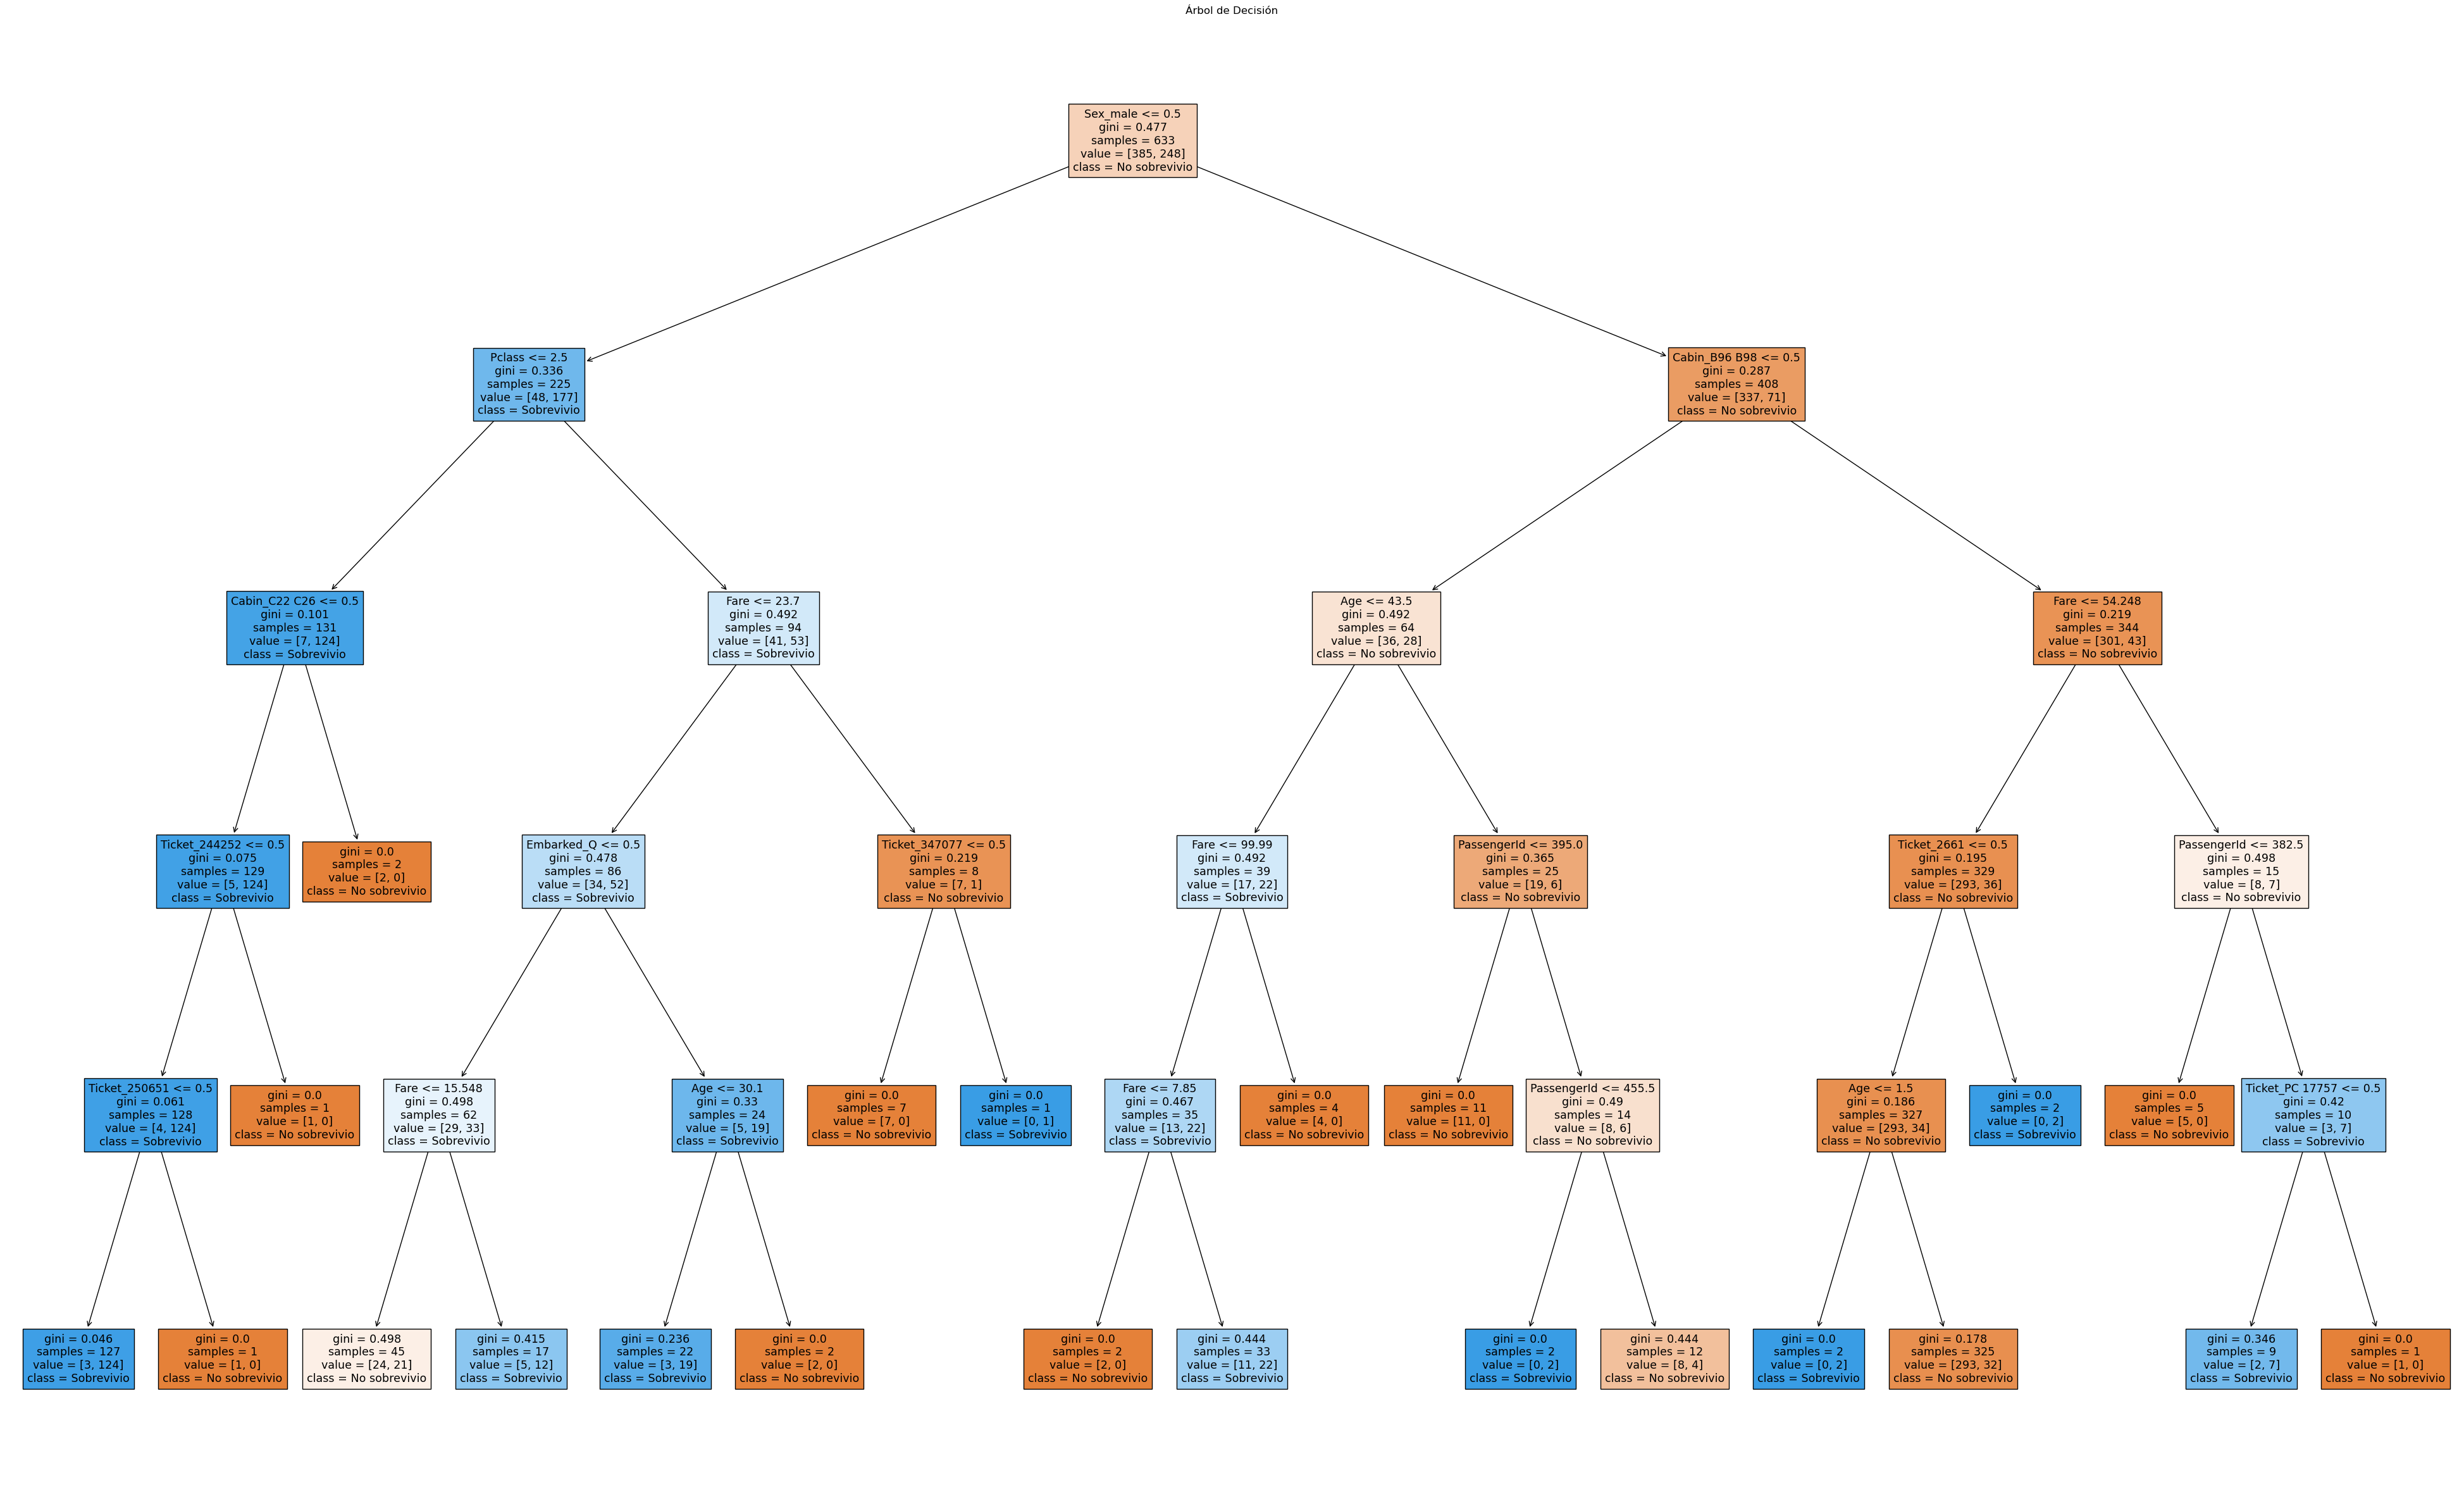

In [41]:
# Visualizar el árbol de decisión
plt.figure(figsize=(50, 30))
plot_tree(modelo_arbol, filled=True, feature_names=columnas_finales, class_names=['No sobrevivio', 'Sobrevivio'])
plt.title('Árbol de Decisión')
plt.show()

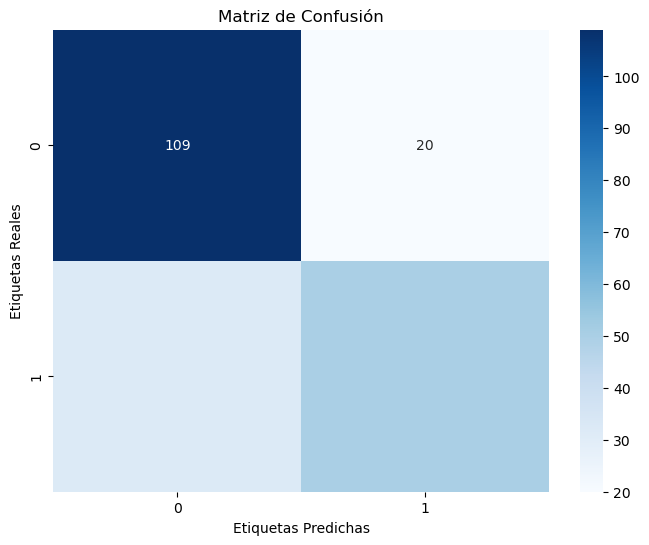

In [42]:
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(Y_test, predicciones)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()

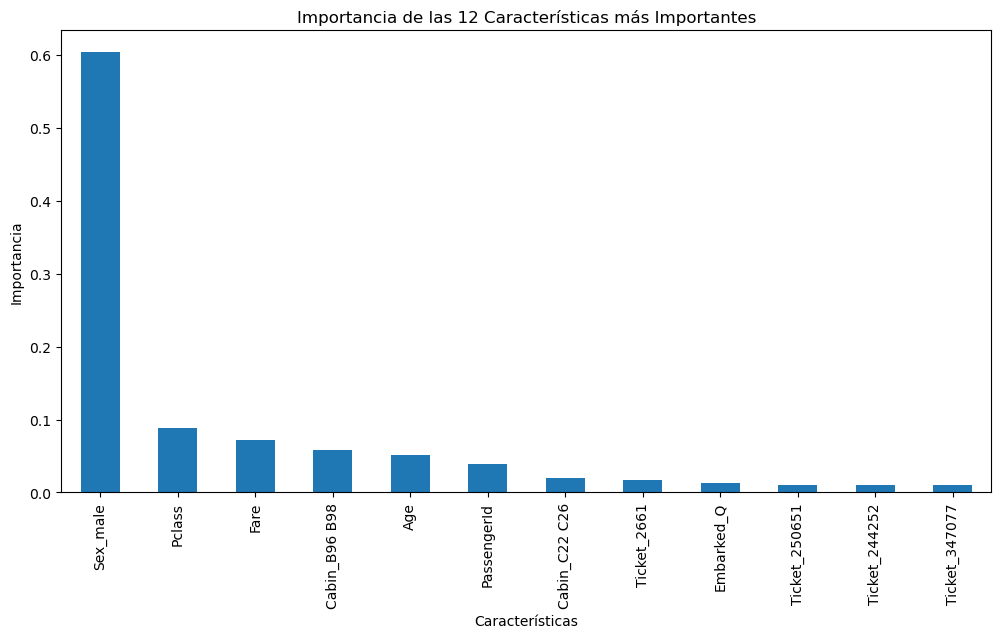

In [43]:
# Obtener la importancia de las características del modelo
importancias = modelo_arbol.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importancias_df = pd.DataFrame(importancias, index=columnas_finales, columns=['Importancia'])
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

# Seleccionar solo las primeras 12 características más importantes
importancias_df_top12 = importancias_df.head(12)

# Plot Gráfico de Importancia de Características (solo las 12 principales)
importancias_df_top12.plot(kind='bar', figsize=(12, 6), legend=False)
plt.title('Importancia de las 12 Características más Importantes')
plt.ylabel('Importancia')
plt.xlabel('Características')
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos

Para empezar, lo que se realizó fue cargar las librerías necesarias que nos permitirían manipular el archivo con la finalidad de que sea más manipulable en ese mismo paso realizamos el importe de las librerías par los modelos de ciencia de datos con el fin de poder aplicarles las métricas del modelo arboles de decisión y poder graficarlas.

Luego pudimos realizar el cargo del archivo con el cual vamos a trabar y le dimos la lectura de los primeros 10 datos con el fin de entender la información del archivo a trabajar, una vez aquí le ejecutaremos una secuencia la cual nos permitirá obtener las medidas de tendencia central y medidas de dispersión
.
Lo siguiente que se realizo fue la identificación de datos faltantes y valores atípicos, para los valores faltantes, en mi criterio lo que se realizo fue un gráfico de cajas para así poder identificar en que rango estaban los valores atípicos, luego se realizó una descripción y me di cuenta que habían falta muchos valores, entonces al realizar la eliminación de los valores atípicos se eliminarían demasiados datos, como por ejemplo en la edad hacían falta como 800 valores aproximadamente, entonces lo que se me dificultaría la manipulación al contar con pocos datos, así que reemplace los valores faltantes por la media y la moda en el caso de los valores string, con esto se puede obtener una mejor compresión de los datos. Una vez que todos se hayan reemplazado se realizo ahora si la eliminación de los datos atípicos, comencé por la edad, elimine los menores de 1 año y en este caso deje el mayor numero en edad que fue 80 me parece que estaría bien, luego en SibSp que serian los hermanos y hermanas abordo deje un mínimo de 4 por lo que me parece un numero no tan fuera de lo normal, en estos cosos como en los siguiente toco confirmar que era <= o >= ya que al no poner el = me eliminaba el valor mínimo, me tomaba como atípico el 0 entonces toco definir en el código, luego en si habían padre o hijos donde ese especifico que lo máximo serian 3 lo que suele una familia de 4, y por último el precio aquí deje como valor mínimo 1 dólares ya sea por algún favor, pariente, ayuda, en cualquier caso y el máximo quedo en 300, obte por ese mínimo también el tema de los datos para procurar perder el menor posible, luego se realizo el análisis de cuantos valores quedaron un total de 844/891, lo que significa una pérdida de 47 dato
s.
, luego de esto seleccione como variable importante la supervivencia, y esto nos permite realizar la división del dataset en Train y Test para evaluar correctamente el modelo, aquí se tuvo que agregar unas opciones para poder convertir el texto y poder graficar correctamente los diferentes gráficos que aparecerán, con esto realizado se entrenó el modelo configurando los diferentes hiperparámetros aquí podemos observar la precisión del modelo de un 75%, ahora, se evaluo el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. Podemos verificar las precisiones de las instancias clasificadas sean realmente de la cualidad de la predicción con esto se obtuvieron los siguientes resultados, los que no sobrevivieron tuvo una precisión del 77% y los que sobrevivieron fue de 71%, Con estos datos aplicaremos el recall aquí podemos tener una mayor comprensión, el recall es la proporción de instancias correctamente clasificadas como positivas sobre el total de instancias que realmente son positivas y nos arroja lo siguiente para los que no sobrevivieron se obtuvo un 84% lo que indica que el modelo pudo identificar correctamente la mayor parte de la información y para los que sobrevivieron tuvo un bajo al 66%, lo que sigue siendo satisfactorio superando el 50
% .
el árbol de decisión que nos permite ver una parte de la información que llevo a las diferentes posibilidades de sobrevivir o no, también contamos con la matriz de Confusión que nos proporciona información valiosa sobre los tipos de errores que comete el modelo, como falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos. Las filas representan las clases reales y las columnas representan las clases predichas por el modelo. Cada celda de la matriz contiene el número de instancias que pertenecen a una clase específica según la predicción del modelo. Y por último, se realizó la gráfica de la importancia de las características lo que nos muestra según el modelo que características son más importantes en esta ocasión seleccione las 12 mas importantes
